In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd


In [14]:
df = pd.read_csv('datatas.csv', sep=';')

In [20]:
df = df.drop(columns=['no','kode barang'])

In [28]:
df.status = df.status.str.strip()

In [30]:
dataset = df

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
enc = LabelEncoder()

In [34]:
dataset['model tas'] = enc.fit_transform(dataset['model tas'].values)
dataset['ukuran'] = enc.fit_transform(dataset['ukuran'].values)
dataset['warna'] = enc.fit_transform(dataset['warna'].values)
dataset['status'] = enc.fit_transform(dataset['status'].values)

In [35]:
dataset

,model tas,ukuran,warna,harga,status
0,1,0,0,90000.0,1
1,1,2,3,100000.0,1
2,1,0,0,90000.0,0
3,1,2,3,90000.0,0
4,1,2,5,70000.0,1
...,...,...,...,...,...
95,2,3,0,80000.0,0
96,2,3,4,65000.0,1
97,2,3,6,70000.0,1
98,2,3,2,50000.0,1


In [36]:
atr_dataset = dataset.drop(columns = 'status')
atr_dataset

,model tas,ukuran,warna,harga
0,1,0,0,90000.0
1,1,2,3,100000.0
2,1,0,0,90000.0
3,1,2,3,90000.0
4,1,2,5,70000.0
...,...,...,...,...
95,2,3,0,80000.0
96,2,3,4,65000.0
97,2,3,6,70000.0
98,2,3,2,50000.0


In [37]:
cls_dataset = dataset['status']
cls_dataset

0     1
1     1
2     0
3     0
4     1
     ..
95    0
96    1
97    1
98    1
99    0
Name: status, Length: 100, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [39]:
xtrain, xtest, ytrain, ytest = train_test_split(atr_dataset, cls_dataset, test_size=0.2, random_state=1)
tree_dataset = DecisionTreeClassifier(random_state=1)
tree_dataset.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=1)

In [40]:
y_pred = tree_dataset.predict(xtest)
Cm = confusion_matrix(ytest, y_pred)
print("Confusion Matrix")
print(Cm)
akurasi = classification_report(ytest, y_pred)
print("Tingkat Akurasi Algoritma C4,5")
print('Akurasi :', akurasi)
akurasi = accuracy_score(ytest, y_pred)
print("Tingkat Akurasi : %d persen" %(akurasi*100))

Confusion Matrix
[[ 5  4]
 [ 1 10]]
Tingkat Akurasi Algoritma C4,5
Akurasi :               precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       0.71      0.91      0.80        11

    accuracy                           0.75        20
   macro avg       0.77      0.73      0.73        20
weighted avg       0.77      0.75      0.74        20

Tingkat Akurasi : 75 persen


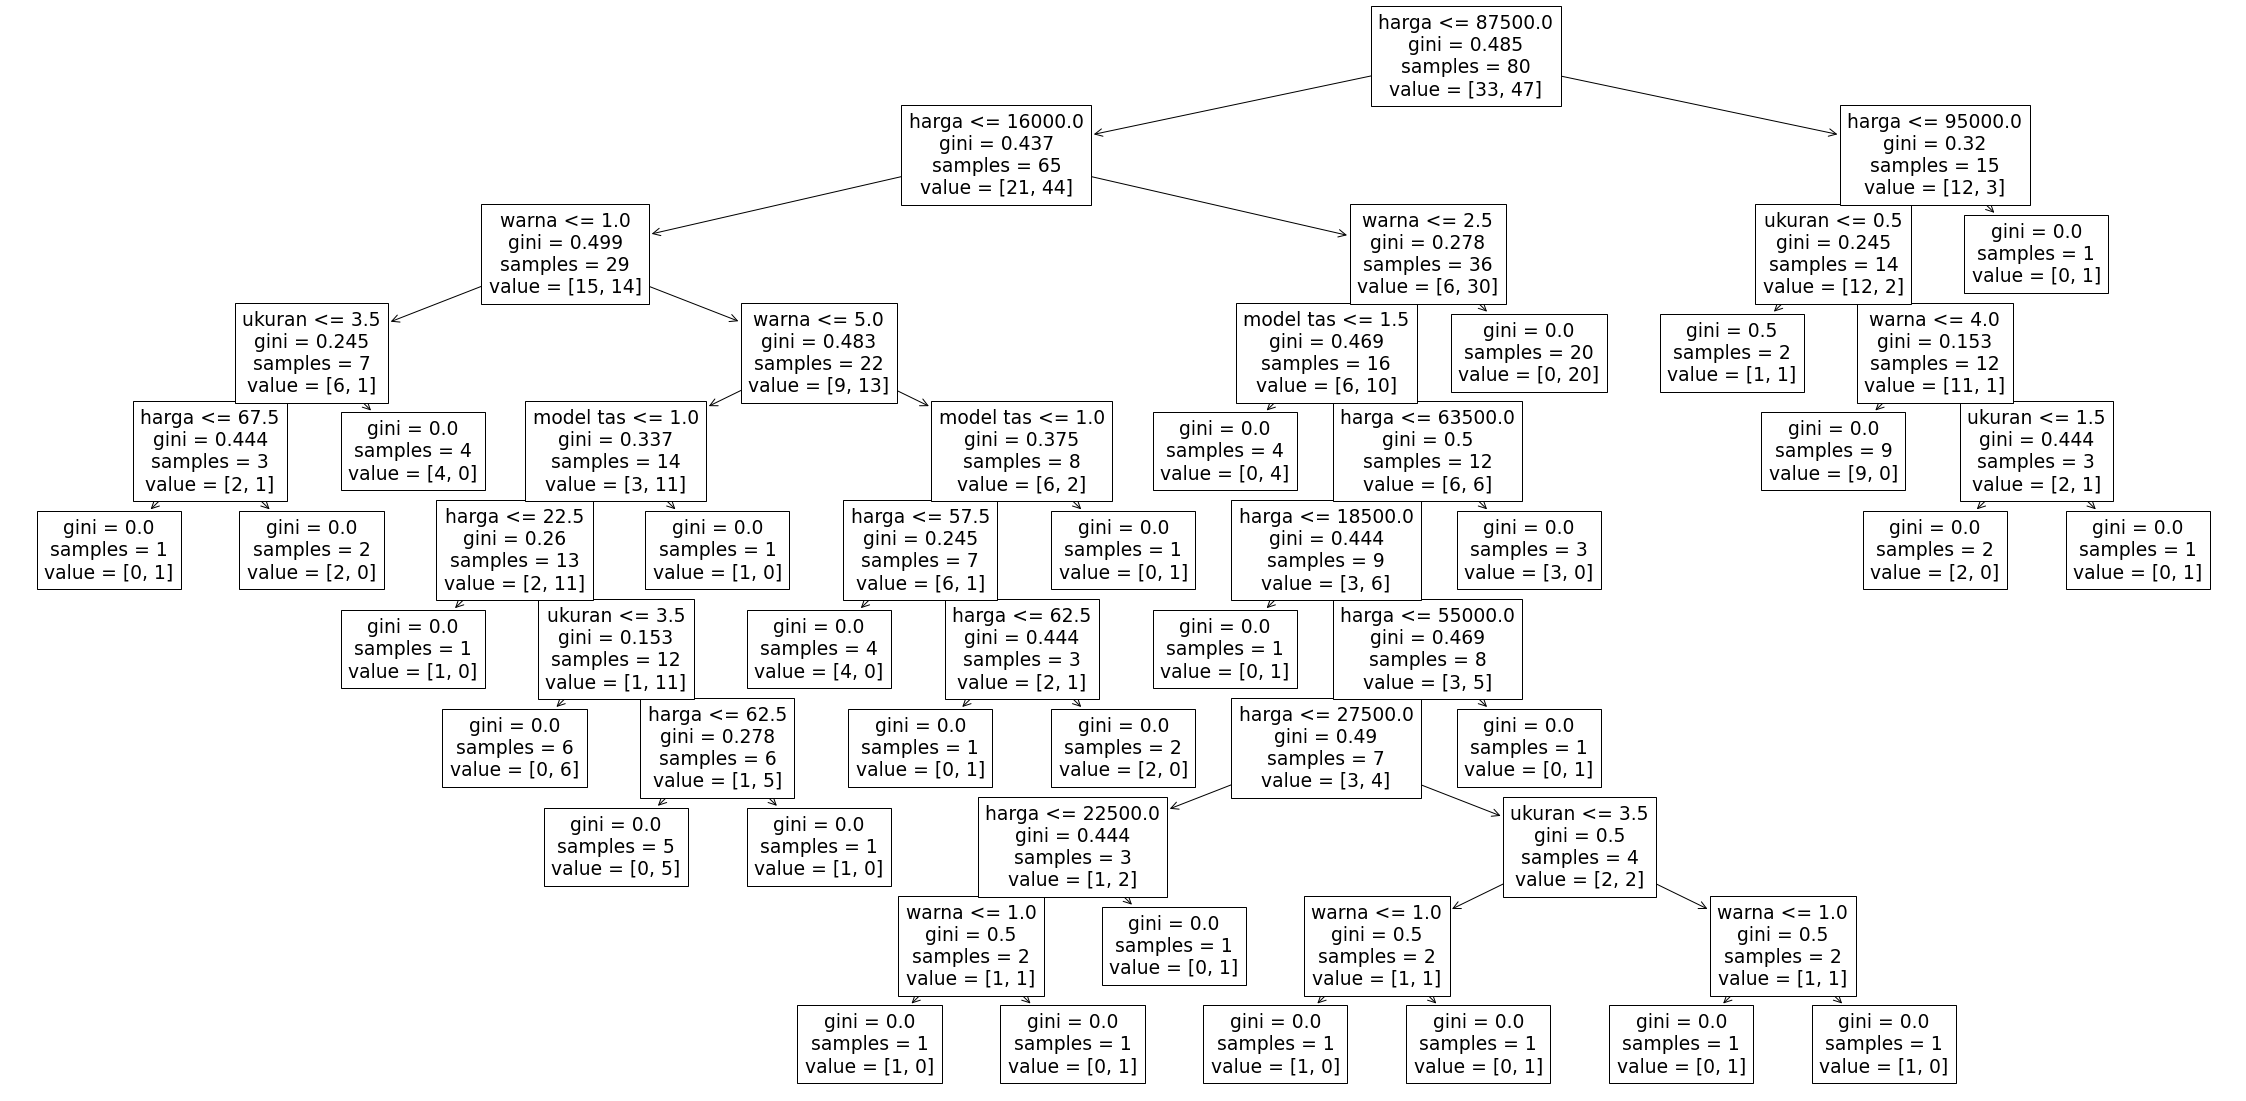

In [77]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(tree_dataset, feature_names = atr_dataset.columns)
plt.show()